<img src="https://media2.dev.to/dynamic/image/width=1000,height=420,fit=cover,gravity=auto,format=auto/https%3A%2F%2Fdev-to-uploads.s3.amazonaws.com%2Fuploads%2Farticles%2Fyx79hpvil0cbgwbrrybs.png" style="float: right; margin-top: 110px; width: 400px; height: 200px;" alt="Descripción de la imagen">

# Linear Regression with Model Training

#### - Single or Multiple with Simultaneous Evaluation with Statsmodel and Scikit-Learn

#### - statistical assumptions
######   -- Linearity
######   -- Independence of Errors
######   -- Normality
######   -- Homcedasticity
######   -- Multicollinearity

#### - Data Transformation Options

#### - Scikit-Learn Model Serialization Option

<img src="https://api.andreaprovino.it/wp-content/uploads/2020/04/crisp-dm-data-science-machine-learning-ibm-guida-italiano-data-mining.jpeg" width="200" height="200" align=Left>

# Business Understanding
######  Declaracion de variables y objetivos de la investigacion

*Se tienen los datos de las ventas de un negocio y los gastos relacionados a canales de marketing utilizados en cada nivel de ventas, se desea conocer si las ventas estan relacionadas con cada de los factores (canales de marketing como Radio, TV, Redes sociales e influencers), que tipo de relacion tienen los factores (si es positiva o negativa) y cual tienen mayor impacto. A partir de ese analisis construir un mdelo capaz de predecir niveles de futuros con nuevas inversiones en canales de marketeing, se tiene que evaluar la capacidad predictora del modelo y que cumpla con los supuestos especificos para el tipo de estudio estadistico. Ademas, serializar el modelo a a traves de un archivo exportado*

*A partir de esto establece:* 
**Variable dependiente de tipo continua 'Ventas'**

**Variables independientes: 'Radio', 'Social Media', 'Influencers', 'TV'**


<img src="https://api.andreaprovino.it/wp-content/uploads/2020/04/crisp-dm-data-science-machine-learning-ibm-guida-italiano-data-mining.jpeg" width="200" height="200" align=Left>

# Data Understanding
######  Recopilacion y exploracion de los datos EDA

In [1]:
# Import relevant Python libraries and modules.

import pandas as pd

import seaborn as sns
# pairplot Matriz de graficos de graficos de dispersion para visualizar de un dataframe posible relacion de variables
# heatmap mapa de calor para visualizar niveles de correlacion entre variables
# regplot Grafico para visualizar regresion lineal de los datos, y ajusta una línea de regresión a los datos. (Aplicado a datos  entrenados)
# histplot Visualiza un histograma para evaluar la forma de campana y la normalidad de los datos
# scatterplot Grafica de dispersion.Muestra la relacion entre dos variables.Para analizar los residuos con los valores ajustados --> homocedasticidad

import matplotlib.pyplot as plt
# plt.subplots  Generar dos subplots para colocar dos graficos hechos con seaborn uno al lado del otro
# plt.show()    Mostrar graficos hechos con seaborn

import statsmodels.api as sm                                        
# sm.add_constant - Se anade constantes (1) a las variables de entrenamiento
# sm.OLS -  Crea el modelo a partir de los datos entrenados
# sm.qqplot - para crear grafico q-q visulizacion de normalidad

from statsmodels.stats.stattools import durbin_watson
# Prueba de independencia de errores

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Prueba de independencia de errores

from scipy import stats
# stats.shapiro prueba de normalidad de Shapiro-wiks

from scipy.stats import levene, bartlett
from sklearn.linear_model import LinearRegression
# levene, bartlett para homocedasticidad

from sklearn.model_selection import train_test_split                                         
# Dividir los datos de entrenamiento 

from sklearn.linear_model import LinearRegression
# Creacion del modelo con sklearn. Modelo solo para serializacion.

from statsmodels.stats.outliers_influence import variance_inflation_factor
# Multicolinealidad

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score                # Validar modelo
import numpy as np                                                                           # Calculo de R2, RMSE para validacion del modelo



In [2]:
# IMPORT YOUR DATA.
data = pd.read_csv("/kaggle/input/simple-simple/marketing_sales_data.csv")

# Display the first 10 rows of the data.
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


<img src="https://api.andreaprovino.it/wp-content/uploads/2020/04/crisp-dm-data-science-machine-learning-ibm-guida-italiano-data-mining.jpeg" width="200" height="200" align=Left>

# Data Preparation
######  Limpiar y transformar los datos para que sean adecuados para el modelado

In [3]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            571 non-null    object 
 1   Radio         571 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         571 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


In [4]:
data.isna().any(axis=1).sum()  # Busca valores nulos por filas

3

In [5]:
data = data.dropna(axis=0)     # Elimina filas con valores nulos

data.isna().any(axis=1).sum()  # Segundo chequeo de filas nulas

0

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


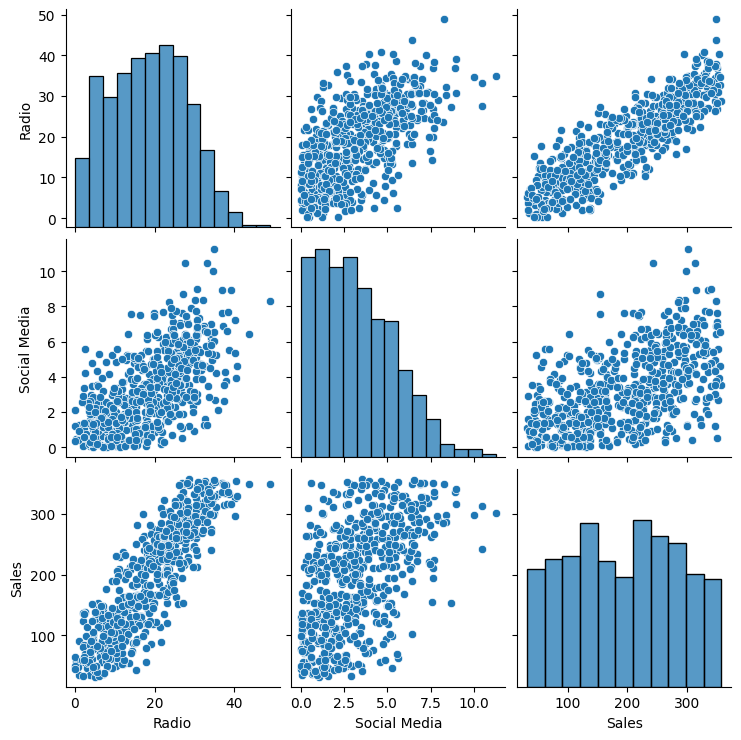

In [6]:
sns.pairplot(data)
plt.show()

              Social Media     Radio     Sales
Social Media      1.000000  0.611509  0.531834
Radio             0.611509  1.000000  0.870158
Sales             0.531834  0.870158  1.000000


<Axes: >

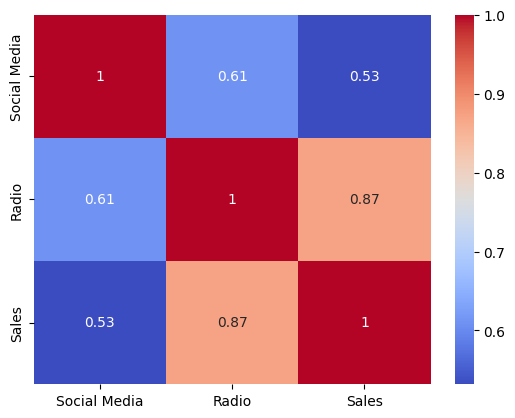

In [7]:
correlation_matrix = data[['Social Media','Radio','Sales']].corr(method='pearson')

### method{‘pearson’, ‘kendall’, ‘spearman’} or callable
### Correlación: Para explorar las relaciones entre variables antes de construir un modelo.


# podemos imprimir correlation_matrix o Crear un mapa de calor
print (correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


<img src="https://api.andreaprovino.it/wp-content/uploads/2020/04/crisp-dm-data-science-machine-learning-ibm-guida-italiano-data-mining.jpeg" width="200" height="200" align=Left>

# Data Analysis / Modeling
######  Seleccionar y aplicar técnicas de modelado.

In [8]:
# Seleccion de variables

# Regresion lineal simple
x = data[['Radio']]        # se hace para generar un dataframe en vez de una serie. Es necesario para el modelo sklearn que requiere arrglo 2d


# Regresion Lineal multiple
# x = data[['Radio', 'Social Media']]


y = data['Sales']

***Creacion del Modelo con Statsmodel para evaluar calidad y cumplimiento de supuestos***

In [9]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)         # Entrenamos el modelo 

######## MODELO CON STATSMODEL #################

# Agregar constante para la intersección (1) para modelo de statsmodel
x_train = sm.add_constant(X_train)     
x_test = sm.add_constant(X_test)

# Modelo statsmodels
model = sm.OLS(y_train, x_train)      # Primero y luego x
results = model.fit()                 # Ajuste del modelo

# Predicion de los datos aplicando el modelo a los datos de prueba x_test (Calidad del modelo RMSE, MAE y r2)
y_pred = results.predict(x_test)  

# Predicion de los datos aplicando el modelo a los datos de entrenamieno x_train (uso para calcular los residuos solamente aplicacion para supuestos)
y_pred_train = results.predict(x_train)  



######## MODELO CON SKLEARN #################

# Modelo de scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)               # Primero X luego y. Suele usarse X_train en vez de x_train

# Realizar predicciones
# y_pred = model_sklearn.predict(X_test)           # No es neceaario. Porque este es modelo a serializar. No el modelo a evaluar.







LinearRegression()

***Predicion de los datos aplicando el modelo a los datos no utilizados de la variable asumiendolos como nuevos***

***Calcular y_pred significa aplicar el modelo (prediccion) a los datos de prueba (x_test) de la variable independientes, que son el 20 % de los datos   que no se utlizaron como datos de entrenamiento (x_train).***

***El objetivo fundamental es luego compararlos con los datos del 20 % de la variable dependiante (y_test) que tampoco se usaron como datos de entrenamiento (y_train). Se supone que si el modelo es efectivo los resultados de y_pred y y_test sean similares*** 


<img src="https://api.andreaprovino.it/wp-content/uploads/2020/04/crisp-dm-data-science-machine-learning-ibm-guida-italiano-data-mining.jpeg" width="200" height="200" align=Left>

# Validation / evaluation
######  Evaluar el rendimiento del modelo en relación con los objetivos de negocio.

In [10]:
# Get summary of results.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     1375.
Date:                Sun, 15 Feb 2026   Prob (F-statistic):          2.48e-139
Time:                        13:58:07   Log-Likelihood:                -2367.4
No. Observations:                 455   AIC:                             4739.
Df Residuals:                     453   BIC:                             4747.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.7053      4.544      9.398      0.000      33.775      51.636
Radio          8.0256      0.216     37.083      0.000       7.600       8.451
==============================================================================
Omnibus:                        3.173   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.205   Jarque-Bera (JB):                2.714
Skew:                          -0.093   Prob(JB):                        0.257
Kurtosis:                       2.670   Cond. No.                         46.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### ***Valores de interes y su interpretacion  del sumario de regresion lineal***

**R-squared:** Significa que el 75 % (0.752) del valor de la variable (y) depende del valor de la variable (x). En este caso que el 75 % del valor de las ventas depende de la promocion de radio. R-squared es ademas la correlacion de Person al cuadrado en este caso Person = 0.87


**Radio P-value < 0.5**: 0.00 siginificancia de la relacion entre las dos variables. Se toma el valor P de la fila de la variable independiente.

**Coef - Const: es la y-Intercept de 42.70** Intersección (Intercept) = 42.70. Significa el valor predicho de **y** para **x** = 0

**Pendiente (Slope):** Indica la fuerza y dirección de la relación lineal entre las variables.

**Pendiente (Slope):** 8.02 ..... Se puede interpretar por cada dolar invertido en promocion de radio las ventas subieran 8.02 dólares

**[0.025  0.975]  Retorna un intervalo de confianza con un nivel de confianza del 95 %** 

###### https://www.youtube.com/watch?v=gmzZv6_FQtE

In [11]:
# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular el MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular el R2
r2 = r2_score(y_test, y_pred)

min_y_test = y_test.min() 
max_y_test = y_test.max()

print("Rango de y_test desde: ",min_y_test ," a ", max_y_test)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-cuadrado:", r2)

Rango de y_test desde:  31.19940869  a  358.4207386
RMSE: 46.569781996326284
MAE: 36.53018786943373
R-cuadrado: 0.7709184679528608


En este caso, un R-cuadrado de 0.77 significa que el modelo explica aproximadamente el 77% de la varianza en la variable dependiente. ***ACEPTABLE***

RMSE y MAE podrian ser aceptables para el rango. Revisar analisis:
https://docs.google.com/document/d/1R0PM7bk7KnlFyfnN79ZC35jQcEU2vL1XlVVJWPwqDNI/edit?usp=drive_link

## Supuestos

##### El supuesto de linealidad se aplica a las variables independiente y dependiente, la normalidad y la homocedasticidad se evalua a los residuos

### Calculo de residuos

In [12]:
# y_pred = results.predict(x_test)                          # Prediccion de datos a partir de x_test (Ya calculado)
# y_pred_train = results.predict(x_train)                   # Prediccion de datos a partir de x_train (Ya calculado)


residuals_train = y_train - y_pred_train                 # Calcular los residuos de los datos de entrenamiento
residuals_test = y_test - y_pred                         # Calcular los residuos de los datos de prueba


### Comprobacion de linealidad

##### El supuesto de linealidad se aplica a las variables independiente y dependiente.

****Debe existir una relación lineal entre la variable dependiente y cada una de las variables independientes****

<Axes: xlabel='Radio', ylabel='Sales'>

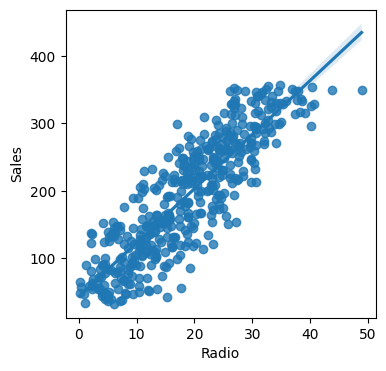

In [13]:
# Plot the OLS data with the best fit regression line.
training = pd.concat([x_train, y_train],axis=1)

f, axes = plt.subplots(1, 1, figsize=(4, 4))
sns.regplot(x = 'Radio', y= 'Sales', data = training, ax = axes)
#sns.regplot(x = 'Social Media', y= 'Sales', data = training)    # Para el caso de regresion lineal multiple

### Independencia de los Errores
##### La independencia, normalidad y homocedasticidad se aplica a los residuos

In [14]:
# Prueba de Durbin-Watson
dw_stat = durbin_watson(residuals_train)

print(f"Estadística de Durbin-Watson: {dw_stat}")

# Interpretación
if 1.5 < dw_stat < 2.5:
    print("Los residuos parecen ser independientes.")
else:
    print("Hay evidencia de autocorrelación en los residuos.")

Estadística de Durbin-Watson: 1.8480059930812547
Los residuos parecen ser independientes.


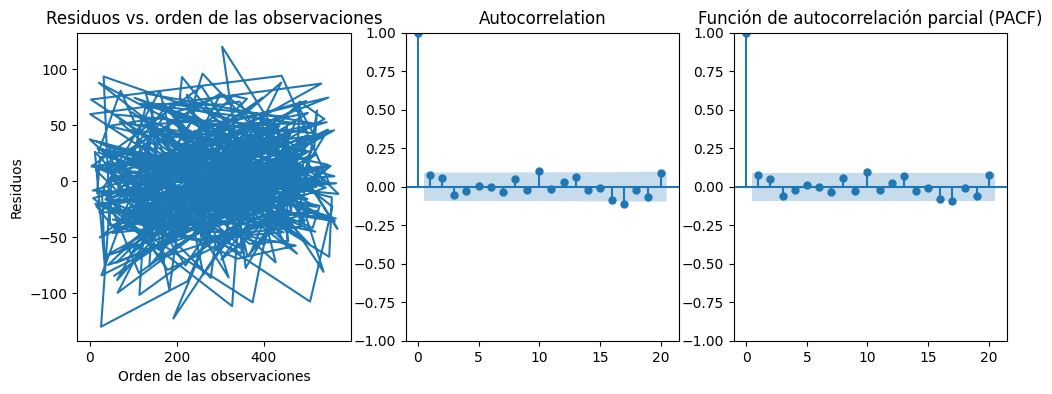

In [15]:
f, axes = plt.subplots(1, 3, figsize=(12, 4))

# Gráfico de residuos vs. orden de las observaciones
axes[0].plot(residuals_train)
axes[0].set_title("Residuos vs. orden de las observaciones")
axes[0].set_xlabel('Orden de las observaciones')
axes[0].set_ylabel('Residuos')


# Gráficos de autocorrelación
plot_acf(residuals_train, lags=20, ax=axes[1])
plt.title("Función de autocorrelación (ACF)")


plot_pacf(residuals_train, lags=20, ax=axes[2])
plt.title("Función de autocorrelación parcial (PACF)")

plt.show()



https://docs.google.com/document/d/18RK8zYZNJlcYvsKNpkKwjS-33M-jme30g1TqFF-Rpgc/edit?usp=sharing

### Normalidad
##### La normalidad y la homocedasticidad se evalua a los residuos. 

### Prueba de Normalidad de residuos

###### Normalidad con Shapiro–Wilk test

In [16]:
F, p1 = stats.shapiro(residuals_train)
F, p2 = stats.shapiro(residuals_test)
print(str(round(p1*100,2)), ' % If p-value is higher that alpha (5 %) we assume normality in the train data (Este es mas importante)')
print(str(round(p2*100,2)), ' % If p-value is higher that alpha (5 %) we assume normality in the test data')

25.72  % If p-value is higher that alpha (5 %) we assume normality in the train data (Este es mas importante)
80.92  % If p-value is higher that alpha (5 %) we assume normality in the test data


##### Normalidad con visulizacion
###### - Campana de gauss para visualizar la distribucion de los residuos con un histograma

###### - Grafico Q-Q Evaluar la normalidad: Su principal uso es determinar si un conjunto de datos se ajusta a una distribución normal. 
###### Si los puntos en el gráfico Q-Q se alinean aproximadamente sobre una línea recta, es una indicación de que los datos siguen una distribución normal.**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


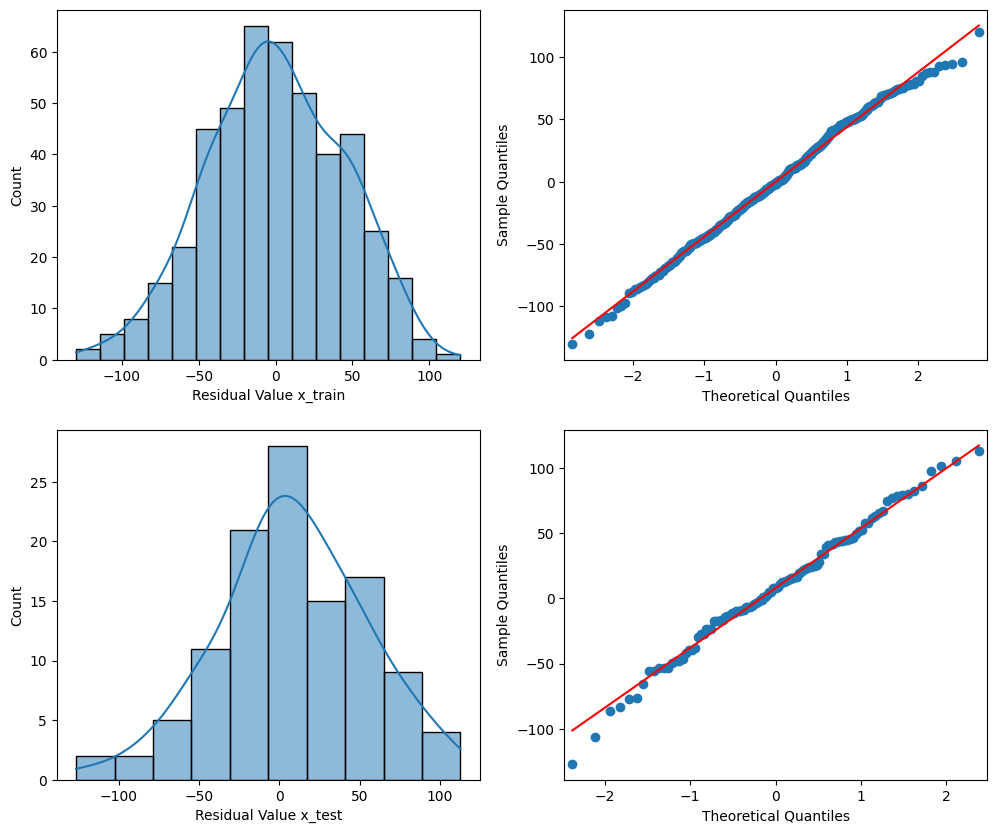

In [17]:


f, axes = plt.subplots(2, 2, figsize=(12, 10))        # Generar subplot de 1 fila y 2 columnas para que los fraficos aparezcan uno lado del otro

fig1 = sns.histplot(residuals_train,kde=True, ax = axes[0,0])             # Histograma: Verifica campana de gauss residuals_train
axes[0,0].set_xlabel("Residual Value x_train")


fig2 = sm.qqplot(residuals_train, line = 's', ax = axes[0,1])         # Grafico q-q Verifica normalidad cuando los puntos se acercan a la linea



fig3 = sns.histplot(residuals_test,kde=True, ax = axes[1,0])             # Histograma: Verifica campana de gauss residuals_test
axes[1,0].set_xlabel("Residual Value x_test")

fig4 = sm.qqplot(residuals_test, line = 's', ax = axes[1,1])         # Grafico q-q Verifica normalidad cuando los puntos se acercan a la linea


# Se usa el matplotlib para generar subplots y colocar 2 graficos al lado del otro
# La grafica del histograma y su configuracion, el grafico q-q todo con seaborn (el uso de plt matplotlib bastante limitido teniendo seaborn)

plt.show()

### Homocedasticidad
##### La normalidad y la homocedasticidad se evalua a los residuos. 

In [18]:
# Prueba de Levene a datos de entrenamiento
# Dividir los residuos en grupos (Segun si ejecutas # 1 # o # 2 # El calculo de homcedasticidad sera para datos de entrenamiento y prueba)
# Ambos seran necesarios

def res_groups(predictions, residual_groups):

    groups = pd.qcut(predictions, q=4, labels=False)

    # Extract residuals for each group
    group1 = residual_groups[groups == 0]
    group2 = residual_groups[groups == 1]
    group3 = residual_groups[groups == 2]
    group4 = residual_groups[groups == 3]

    # Perform Levene's or Bertlett's test
    stat, p = levene(group1, group2, group3, group4) 
    return (round(p,2))

print ('Levene o Bartlett para datos de entrenamiento', res_groups(y_pred_train, residuals_train))
print ('Levene o Bartlett para datos de prueba',        res_groups(y_pred, residuals_test))

# Realizar la prueba de Breusch-Pagan
# Datos de entrenamiento
bp_test = sm.stats.het_breuschpagan(residuals_train**2, x_train)
print('Breusch-Pagan test p-value:', bp_test[1])
# Datos de prueba
bp_test = sm.stats.het_breuschpagan(residuals_test**2, x_test)
print('Breusch-Pagan test p-value:', bp_test[1])

# Para Levene o Bartlett
# Si el valor p es mayor que tu nivel de significancia, no rechazas la hipótesis nula 
# y no hay evidencia suficiente para concluir que existe heterocedasticidad.

# Para Breusch-Pagan
# Si el valor de P es mayor que tu nivel de significancia se rechaza la hipotesis nula de 
# homcedasticidad o sea que hay heterocedasticidad 

Levene o Bartlett para datos de entrenamiento 0.19
Levene o Bartlett para datos de prueba 0.02
Breusch-Pagan test p-value: 0.8002079789289436
Breusch-Pagan test p-value: 0.8233942146925379


### Gráfico de dispersión de residuos 
#### Un gráfico de dispersión de residuos idealmente debería mostrar una nube de puntos aleatoria y dispersa alrededor de una línea horizontal en cero

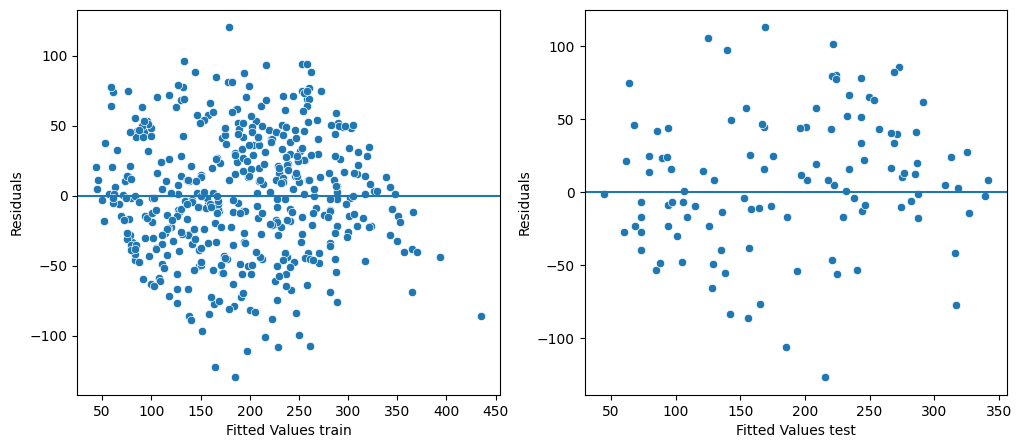

In [19]:
f, axes = plt.subplots(1, 2, figsize=(12, 5)) 

fig = sns.scatterplot(x=y_pred_train, y=residuals_train, ax = axes[0]) 
fig.axhline(0)
fig.set_xlabel("Fitted Values train")
fig.set_ylabel("Residuals")

fig = sns.scatterplot(x=y_pred, y=residuals_test, ax = axes[1]) 
fig.axhline(0)
fig.set_xlabel("Fitted Values test")
fig.set_ylabel("Residuals")
# Todas las funciones de configuracion de graficos se hacen solo con seaborn. Para casos como este matplotlib solo para el show()

plt.show()


### Multicolinealidad

In [20]:
# Suponiendo que X_train es tu matriz de variables independientes
vif_data = pd.DataFrame()
vif_data["feature"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
print(vif_data)

  feature       VIF
0   const  4.832993
1   Radio  1.000000


#### ¿Cómo interpretar los valores de VIF?

###### VIF cercano a 1: Indica que la variable independiente no está muy correlacionada con las otras variables.
###### VIF entre 5 y 10: Sugiere una moderada multicolinealidad.
###### VIF mayor a 10: Indica una fuerte multicolinealidad y puede ser un problema serio.

Anadir analisis de correlacion preliminar para agraguar un analisis grafico

### ¿Cómo interpretar los valores de VIF?

**VIF cercano a 1: Indica que la variable independiente no está muy correlacionada con las otras variables.**

**VIF entre 5 y 10: Sugiere una moderada multicolinealidad.**

**VIF mayor a 10: Indica una fuerte multicolinealidad y puede ser un problema serio.**

### Gráfico de violin y cajas
#### Graficos utiles para verificar info como la mediana, los cuartiles y la dispersión de los datos

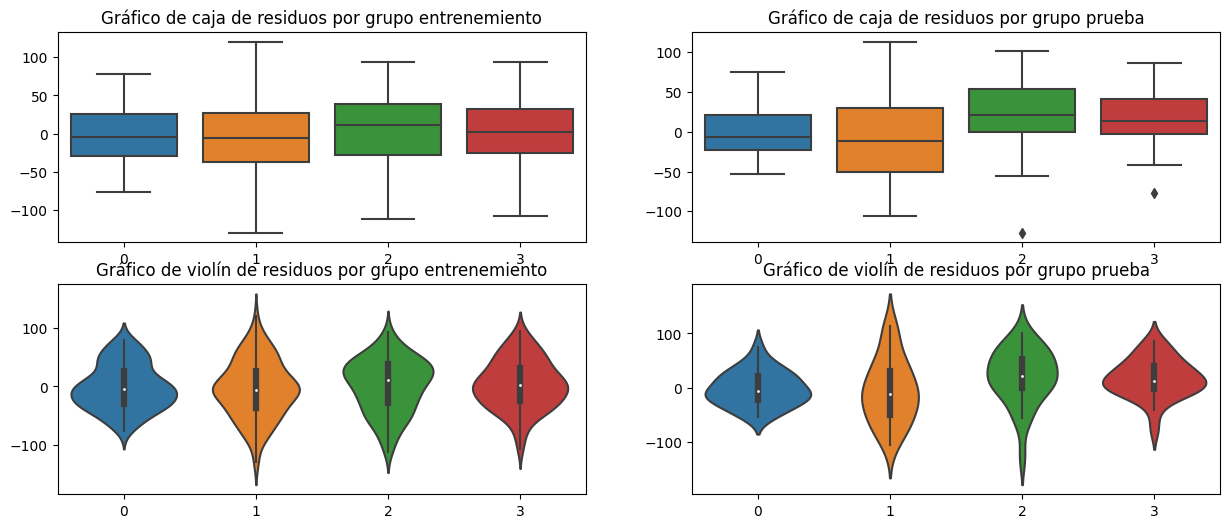

In [21]:
groups_train = pd.qcut(y_pred_train, q=4, labels=False)

# Extract residuals for each group
group1 = residuals_train[groups_train == 0]
group2 = residuals_train[groups_train == 1]
group3 = residuals_train[groups_train == 2]
group4 = residuals_train[groups_train == 3]

groups_test = pd.qcut(y_pred, q=4, labels=False)

# Extract residuals for each group
group1 = residuals_test[groups_test == 0]
group2 = residuals_test[groups_test == 1]
group3 = residuals_test[groups_test == 2]
group4 = residuals_test[groups_test == 3]


Resid_group_train = pd.concat([groups_train, residuals_train], axis = 1)
Resid_group_test = pd.concat([groups_test, residuals_test], axis = 1)
#Resid_group.columns = ['Grupos', 'Residuos']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))

# Crear un gráfico de caja
sns.boxplot(x= groups_train, y= residuals_train, data=Resid_group_train, ax=axes[0,0])
axes[0,0].set_title('Gráfico de caja de residuos por grupo entrenemiento')
sns.boxplot(x= groups_test, y= residuals_test, data=Resid_group_test, ax=axes[0,1])
axes[0,1].set_title('Gráfico de caja de residuos por grupo prueba')

# Crear un gráfico de violín
sns.violinplot(x= groups_train, y= residuals_train, data=Resid_group_train, ax=axes[1,0])
axes[1,0].set_title('Gráfico de violín de residuos por grupo entrenemiento')
sns.violinplot(x= groups_test, y= residuals_test, data=Resid_group_test, ax=axes[1,1])
axes[1,1].set_title('Gráfico de violín de residuos por grupo prueba')
plt.show()

In [22]:
Resid_group_train

,0,1
68,1,1.760480
181,1,-4.153530
63,2,-88.105591
249,0,-6.055337
60,2,-43.723530
...,...,...
71,1,81.051468
106,3,49.982100
271,3,54.309720
436,2,49.346319



##### Grafico de caja

1. Homocedasticidad: El gráfico sugiere que los residuos tienen una variabilidad similar a través de los diferentes grupos. Las cajas de los diferentes grupos tienen un tamaño similar, lo que indica que la dispersión de los datos alrededor de la línea de regresión es aproximadamente constante en todos los grupos. Esto es una buena señal, ya que uno de los supuestos del modelo de regresión lineal es la homocedasticidad, es decir, que la varianza de los errores sea constante.
   
2. Normalidad: Si bien un gráfico de caja no proporciona una evaluación definitiva de la normalidad, podemos obtener algunas pistas. Si las cajas son aproximadamente simétricas y no hay muchos valores atípicos, podría sugerir que los residuos se distribuyen de manera aproximadamente normal. Sin embargo, para una evaluación más precisa, sería necesario realizar pruebas de normalidad como la prueba de Shapiro-Wilk.

##### Análisis del gráfico de violin:

1. Simetría: Si un gráfico de violín es simétrico, significa que los datos se distribuyen de manera uniforme a ambos lados de la mediana. Esta es una característica clave de una distribución normal. La parte izquierda y derecha del violín tienen una forma similar y reflejan una distribución de datos aproximadamente normal.
   
2. Anchura: Esto sugiere Homocedasticidad, si la "anchura" o "cuello" de los violines es similar en todos los grupos, la dispersión (o varianza) de los residuos es aproximadamente igual en cada grupo y sugiere que la varianza de los errores es constante a lo largo de los diferentes valores predichos. Si los violines fueran algunos muy anchos y otros muy estrechos, esto indicaría que la varianza de los residuos cambia de un grupo a otro, lo cual sería un signo de heterocedasticidad. La anchura del violín en un punto particular representa la densidad de los datos en ese valor. Un violín ancho indica que hay muchos datos en ese rango, mientras que un violín estrecho indica que hay pocos datos.
   
3. Mediana similar: La línea negra dentro de cada violín representa la mediana, y podemos observar que las medianas de los diferentes grupos están ubicadas en posiciones similares, lo que sugiere que no hay un sesgo sistemático en los residuos.


### Transformacion a los Datos

##### En caso de incumplimiento de supuestos 3 opciones para transformarlos datos del modelo

In [23]:
### Posibles transformaciones:

#### 1. Logaritmica para las 2 variables  ############

# Transformar la variable dependiente 
#y_train = np.log1p(y_train)
#y_test = np.log1p(y_test)

# Transformar una variable independiente 
#x_train = np.log1p(x_train)
#x_test = np.log1p(x_test)



#### 2. Box cox  ########
#from scipy.stats import boxcox
# Encuentra el valor óptimo de lambda
#box_ytrain = pd.DataFrame(y_train)
#best_lambda, _ = boxcox(box_ytrain['Sales'])
#box_ytest = pd.DataFrame(y_test)
#best_lambda, _ = boxcox(box_ytest['Sales'])
# Aplica la transformación
#y_train_transformed = boxcox(y_train, lmbda=best_lambda)
#y_test_transformed = boxcox(y_test, lmbda=best_lambda)




#### 3. Raiz cuadrada ###########3
# Aplicar la transformación de raíz cuadrada a la variable dependiente
#y_train = np.sqrt(y_train)
#y_test = np.sqrt(y_test)

<img src="https://api.andreaprovino.it/wp-content/uploads/2020/04/crisp-dm-data-science-machine-learning-ibm-guida-italiano-data-mining.jpeg" width="200" height="200" align=Left>

# Deployment
######  Implementar el modelo en un entorno de producción o presentar los resultados a las partes interesadas.

In [24]:
import pickle


# Suponiendo que tienes un modelo entrenado llamado "model"

# Guardar el modelo en un archivo
with open('modelo_regresion.pkl', 'wb') as f:
    pickle.dump(results, f)